In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c,Planck,pi
from random import uniform,randint,gauss

In [6]:
#constant for Fe 
E = 2.3e-15
lifetime = 1.5e-7


In [7]:
#returns frequecy of gamma-rays from moving source
def source(source_vel, del_E ):
    _mu = del_E/Planck

    #doppler effect

    _mu = _mu + (_mu * source_vel)/c

    return _mu

#returns domain of uncertainty
def uncertainty(_mu,_lifetime):
    _delmu = 1/(2*pi*_lifetime)

    r1 = _mu - _delmu/2
    r2 = _mu + _delmu/2

    return r1,r2

In [8]:
iter = 10000000

source_domain = np.linspace(-0.005,0.005,1000)
counter = np.zeros(1000)
min_diff = source(source_domain[1],E)-source(source_domain[0],E)

absorbing_mu = source(0,E)

for i in range(iter):
    
    sel = randint(0,999)
    
    mu = source(source_domain[sel],E)
    r1,r2 = uncertainty(mu,lifetime)
    target = uniform(r1,r2)

    if np.abs(absorbing_mu-target)>min_diff:
        counter[sel]+=1

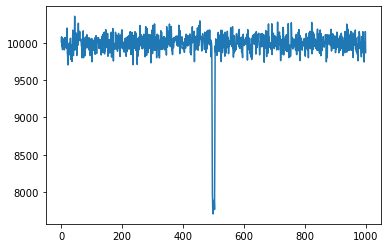

In [9]:
plt.plot(counter)